In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
dataframe = pd.read_csv(r'C:/Users/ParsanAfzar/Documents/NoteJad/DataSet/Competition_Houses/Train.csv')
pd.options.display.max_columns = dataframe.shape[1]
New =dataframe.drop(['Id', 'Alley', 'FireplaceQu', 'MiscFeature', 'Fence', 'PoolQC'], axis=1)
#Num
New['LotFrontage'].fillna(70, inplace = True)
New['MasVnrArea'].fillna(104, inplace = True)
New['GarageYrBlt'].fillna(1978, inplace = True)
#Obj
New['GarageCond'].fillna("None", inplace = True)
New['GarageQual'].fillna("TA", inplace = True)
New['GarageFinish'].fillna("Unf", inplace = True)
New['GarageType'].fillna("Attchd", inplace = True)
New['Electrical'].fillna("SBrkr", inplace = True)
New['BsmtFinType2'].fillna("Unf", inplace = True)
New['MasVnrType'].fillna("None", inplace = True)
New['BsmtFinType1'].fillna("Unf", inplace = True)
New['BsmtExposure'].fillna("No", inplace = True)
New['BsmtCond'].fillna("TA", inplace = True)
New['BsmtQual'].fillna("TA", inplace = True)
RandomForest_DataSet=New.filter(['MSZoning','LotFrontage','LotShape','Neighborhood','Condition1'
,'GarageArea','GarageCars','FullBath','GrLivArea','1stFlrSF','TotalBsmtSF'
'Condition2','OverallQual', 'ExterCond','SalePrice'],axis=1)
RandomForest_DataSet.head(5)

,MSZoning,LotFrontage,LotShape,Neighborhood,Condition1,GarageArea,GarageCars,FullBath,GrLivArea,1stFlrSF,OverallQual,ExterCond,SalePrice
0,RL,65.0,Reg,CollgCr,Norm,548,2,2,1710,856,7,TA,208500
1,RL,80.0,Reg,Veenker,Feedr,460,2,2,1262,1262,6,TA,181500
2,RL,68.0,IR1,CollgCr,Norm,608,2,2,1786,920,7,TA,223500
3,RL,60.0,IR1,Crawfor,Norm,642,3,1,1717,961,7,TA,140000
4,RL,84.0,IR1,NoRidge,Norm,836,3,2,2198,1145,8,TA,250000


In [3]:
encoded_df = RandomForest_DataSet
y = encoded_df["SalePrice"]
del encoded_df["SalePrice"]
#encoded_df.dtypes
X = encoded_df
X.head(5)

,MSZoning,LotFrontage,LotShape,Neighborhood,Condition1,GarageArea,GarageCars,FullBath,GrLivArea,1stFlrSF,OverallQual,ExterCond
0,RL,65.0,Reg,CollgCr,Norm,548,2,2,1710,856,7,TA
1,RL,80.0,Reg,Veenker,Feedr,460,2,2,1262,1262,6,TA
2,RL,68.0,IR1,CollgCr,Norm,608,2,2,1786,920,7,TA
3,RL,60.0,IR1,Crawfor,Norm,642,3,1,1717,961,7,TA
4,RL,84.0,IR1,NoRidge,Norm,836,3,2,2198,1145,8,TA


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preprocess the data
# X is a pandas DataFrame containing the features
# y is a pandas Series containing the target variable
X = pd.get_dummies(X, columns=['MSZoning','LotShape','Neighborhood','Condition1','ExterCond'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:


# Create the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,loss='huber',alpha=0.9
                                  #,min_weight_fraction_leaf=0.0000001just make it worse
                                  # ,min_impurity_decrease=0.8 just make it worse
                                  ,max_features=45
                                  ,criterion='friedman_mse',subsample=1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
# Try different combinations of hyperparameters and evaluate the model
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
print(metrics.r2_score(y_test,model.predict(X_test)))
print(mean_squared_error(y_test, y_pred, squared = False))

0.868998397117923
23936.1299010799


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


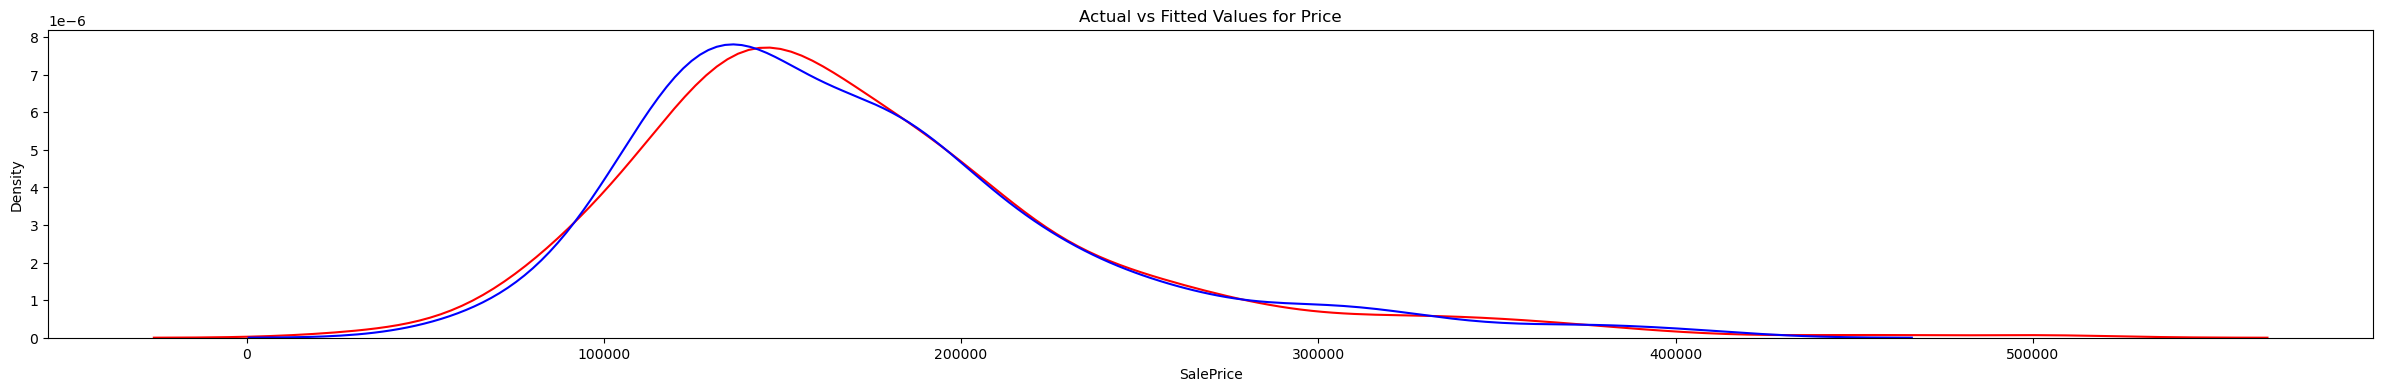

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 4))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()